<a href="https://colab.research.google.com/github/wandieinnocents/SpamSmsDetector_MachineLearning/blob/main/SmsSpamClassifyerFinal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



**The SMS Spam Collection**

---

The SMS Spam Collection is a set of SMS tagged messages that have been collected for SMS Spam research. It contains one set of SMS messages in English of 5,574 messages, tagged according being ham (legitimate) or spam.


In [457]:
# import libraries for reading data, exploring and plotting
import pandas as pd
import nltk
from nltk.corpus import stopwords
import string
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
%matplotlib inline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn import svm 

### Import the dataset from the file
Here we import our dataset to be used in the model prediction

In [458]:
# Read the data frame 
# we got from kaggle , and created a flexible repository on github for easy access
dataFrame = pd.read_csv('https://raw.githubusercontent.com/wandieinnocents/SpamSmsDetector_MachineLearning/main/spam.csv',encoding='latin-1')

### Print the dataset
Display the dataset that we are going to use in our model.

In [459]:
# Print the dataset
dataFrame.head(10)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
5,spam,FreeMsg Hey there darling it's been 3 week's n...,NaN,NaN,NaN
6,ham,Even my brother is not like to speak with me. ...,NaN,NaN,NaN
7,ham,As per your request 'Melle Melle (Oru Minnamin...,NaN,NaN,NaN
8,spam,WINNER!! As a valued network customer you have...,NaN,NaN,NaN
9,spam,Had your mobile 11 months or more? U R entitle...,NaN,NaN,NaN


### Drop columns that  will will not be useful in predicting the model 
In this section we drop the columns that will not be used to train and test the model

In [460]:
#Drop columns that  will will not be useful in predicting the model
df = dataFrame.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'], axis = 1)
df

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


### Rename Labels so they can be easily interpreted
Here we rename the columns so that they are in easily understood Labels

In [461]:
# Rename Columns so they can be easily interpreted
df = df.rename(columns={'v1': 'Class_Label', 'v2': 'Sms'})
df.head(10)

,Class_Label,Sms
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
5,spam,FreeMsg Hey there darling it's been 3 week's n...
6,ham,Even my brother is not like to speak with me. ...
7,ham,As per your request 'Melle Melle (Oru Minnamin...
8,spam,WINNER!! As a valued network customer you have...
9,spam,Had your mobile 11 months or more? U R entitle...


### Display the Column names
Here we Display the new column names

In [462]:
# Displaying column names
df.columns

Index(['Class_Label', 'Sms'], dtype='object')

### Shape of the dataset (Rows and Columns)
This is the shape of the dataset

In [463]:
# Shape of the data (Rows and Columns)
df.shape

(5572, 2)

### Describe the data
There are 4516 ham compared to 653 spam messages. Which indicates that our data is imbalanced. The  popular ham message is “Go until jurong point, crazy.. Available only ”, whereas the most popular spam message is “Please call our customer service representativ.” which occurred 30 and 4 times, respectively.

In [464]:
# Description of the dataframe
df.groupby('Class_Label').describe().T

Class_Label                     ham  \
Sms count                      4825   
    unique                     4516   
    top      Sorry, I'll call later   
    freq                         30   

Class_Label                                               spam  
Sms count                                                  747  
    unique                                                 653  
    top      Please call our customer service representativ...  
    freq                                                     4


### Check for duplicate Rows and remove them from the data
Datasets that contain duplicates may contaminate training data with the test data or vice versa, entries with missing values will lead models to misunderstand features and outliers will undermine the training process – leading your model to “learn” patterns that do not exist in reality.



### Check for  duplicates in the data
In this section we are checking for  duplicates in  our data

In [465]:
# Check Duplicate data in the dataset
count_duplicates = df.duplicated(subset='Sms', keep='first').sum()

In [466]:
# Print Number of Duplicates
print("Duplicates  are : " + str(count_duplicates))

Duplicates  are : 403


## Remove the duplicates from the data
In this section we are removing duplicates from our model

In [467]:
# Remove duplicates from the data
df.drop_duplicates(inplace=True)

In [468]:
# Confirm Duplicate data if it was removed the dataset
count_duplicates_second_check = df.duplicated(subset='Sms', keep='first').sum()

In [469]:
# Print Number of Duplicates to make sure they were removed
print(" Duplicates  are now : " + str(count_duplicates_second_check))

 Duplicates  are now : 0


### New Shape of the dataset  without duplicates (New roles and columns)
This is our New  shape of the dataset after removing duplicates

In [470]:
# Show the new shape of the dataset( Rows and columns ) , after removing duplicate rows
df.shape

(5169, 2)

### Explore the dataset 
Display the number of Ham  messages , and Spam messages in our dataset.

In [471]:
# Explore the dataset
df['Class_Label'].value_counts()

ham     4516
spam     653
Name: Class_Label, dtype: int64

### Bar graph showing Ham and Spam messages
Display a bar graph visulizing the ham and spam messages in our dataset.

Text(0.5, 1.0, 'Number of ham and spam messages')

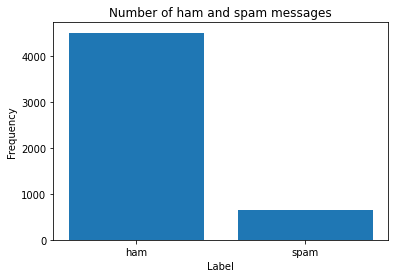

In [472]:
bar = df['Class_Label'].value_counts()
plt.bar(bar.index, bar)
plt.xlabel('Label')
plt.ylabel('Frequency')
plt.title('Number of ham and spam messages')

From the bar graph , we can see that we have an imbalanced dataset , since the number of ham and spam messages are not closely equal to one another.

### Let us Explore our words dataset : Word Clouds 
Generate the frequently occurring words in my spam messages.

Let us first filter the spam and Ham messages in our dataset

In [473]:
# Get all the ham and spam emails
ham_msg = df[df.Class_Label =='ham']
spam_msg = df[df.Class_Label=='spam']

In [474]:
# Print the Ham messages
ham_msg

,Class_Label,Sms
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
6,ham,Even my brother is not like to speak with me. ...
...,...,...
5565,ham,Huh y lei...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [475]:
# Display the spam messages
spam_msg

,Class_Label,Sms
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
5,spam,FreeMsg Hey there darling it's been 3 week's n...
8,spam,WINNER!! As a valued network customer you have...
9,spam,Had your mobile 11 months or more? U R entitle...
11,spam,"SIX chances to win CASH! From 100 to 20,000 po..."
...,...,...
5537,spam,Want explicit SEX in 30 secs? Ring 02073162414...
5540,spam,ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE ...
5547,spam,Had your contract mobile 11 Mnths? Latest Moto...
5566,spam,REMINDER FROM O2: To get 2.50 pounds free call...


In [476]:
# Create numpy list to visualize using wordcloud
ham_msg_text = " ".join(ham_msg.Sms.to_numpy().tolist())
spam_msg_text = " ".join(spam_msg.Sms.to_numpy().tolist())

To visualize using WordCloud(), we extract words most commonly found in ham and spam messages, remove meaningless stop words such as “the”, “a” , “is” etc, and plot it. The WordCloud visualizes the most frequent words in the given text.

Word cloud of Ham messages , that shows the most common words in the ham dataset

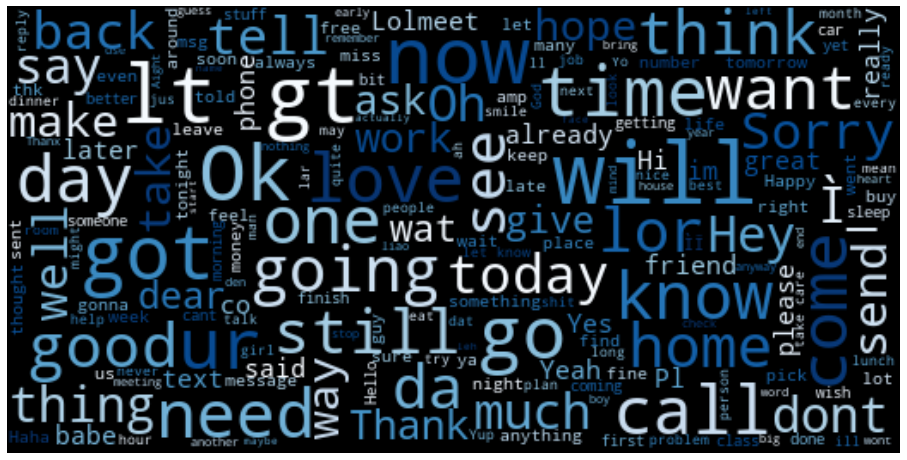

In [477]:
# wordcloud of ham messages
ham_msg_cloud = WordCloud(width =520, height =260, stopwords=STOPWORDS,max_font_size=50, background_color ="black", colormap='Blues').generate(ham_msg_text)
plt.figure(figsize=(16,10))
plt.imshow(ham_msg_cloud, interpolation='bilinear')
plt.axis('off') # turn off axis
plt.show()

The ham message WordCloud below shows that “will”, “Come”, will, Love and “Sorry” are the most commonly appeared word in ham messages.

Word cloud of Ham messages , that shows the most common words in the ham dataset

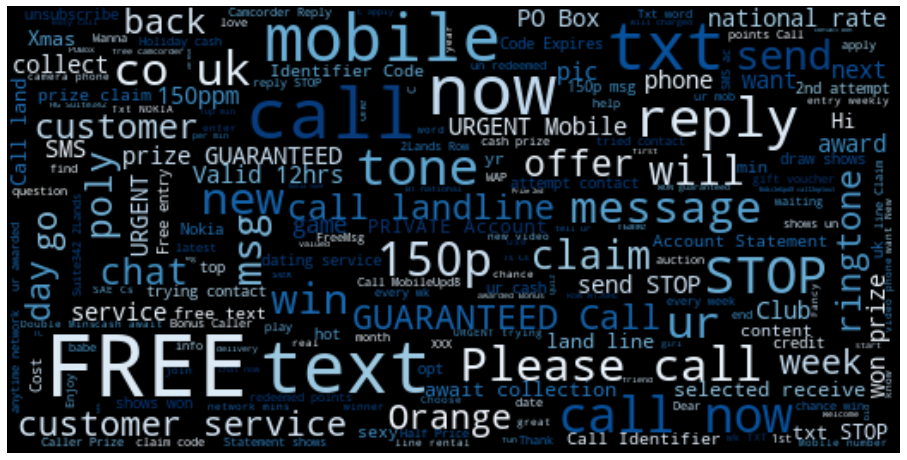

In [478]:
# wordcloud of spam messages
spam_msg_cloud = WordCloud(width =520, height =260, stopwords=STOPWORDS,max_font_size=50, background_color ="black", colormap='Blues').generate(spam_msg_text)
plt.figure(figsize=(16,10))
plt.imshow(spam_msg_cloud, interpolation='bilinear')
plt.axis('off') # turn off axis
plt.show()

From the visualization , The spam message WordCloud below shows that “Free”, “call”, “text”, “claim” and“reply” are most commonly appeared words in spam messages.

**CONVERT SPAM AND HAM TO NUMERIC FORMAT**

Lets now convert , the spam messages and the ham  messages to numeric format so that it can easily be used in the model , and machine readable format.

In [479]:
# Convert ham to 0 , and spam to 1
df = df.replace(['ham','spam'],[0, 1])
df.head(10)

,Class_Label,Sms
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
5,1,FreeMsg Hey there darling it's been 3 week's n...
6,0,Even my brother is not like to speak with me. ...
7,0,As per your request 'Melle Melle (Oru Minnamin...
8,1,WINNER!! As a valued network customer you have...
9,1,Had your mobile 11 months or more? U R entitle...


**REMOVE STOP WORDS AND PUNCTUATIONS FROM THE DATASET**

* Stop words are the words which are generally filtered out before processing a natural language are called stop words. These are actually the most common words in any language (like articles, prepositions, pronouns, conjunctions, etc) and does not add much information to the text.

*   We remove them using NLTK Library, (Natural Language Toolkit)






In [480]:
# import naturlal language toolkit
import nltk
nltk.download('stopwords')

#remove stop words and punctuations
import string
def process_sms(Sms):

    Sms = Sms.translate(str.maketrans('', '', string.punctuation))
    Sms = [word for word in Sms.split() if word.lower() not in stopwords.words('english')]

    return " ".join(Sms)

df['Sms'] = df['Sms'].apply(process_sms)
# print out the dataframe with stop words and punctuations removed
df.head(10)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,Class_Label,Sms
0,0,Go jurong point crazy Available bugis n great ...
1,0,Ok lar Joking wif u oni
2,1,Free entry 2 wkly comp win FA Cup final tkts 2...
3,0,U dun say early hor U c already say
4,0,Nah dont think goes usf lives around though
5,1,FreeMsg Hey darling 3 weeks word back Id like ...
6,0,Even brother like speak treat like aids patent
7,0,per request Melle Melle Oru Minnaminunginte Nu...
8,1,WINNER valued network customer selected receiv...
9,1,mobile 11 months U R entitled Update latest co...


Dataframe for our Class labels and the sms

In [481]:
# new dataframe for our class label and sms
Sms = pd.DataFrame(df['Sms'])
Class_Label = pd.DataFrame(df['Class_Label'])

In [482]:
# Sms  without stop words
Sms

,Sms
0,Go jurong point crazy Available bugis n great ...
1,Ok lar Joking wif u oni
2,Free entry 2 wkly comp win FA Cup final tkts 2...
3,U dun say early hor U c already say
4,Nah dont think goes usf lives around though
...,...
5567,2nd time tried 2 contact u U å£750 Pound prize...
5568,Ì b going esplanade fr home
5569,Pity mood Soany suggestions
5570,guy bitching acted like id interested buying s...


In [483]:
# Class Labels
Class_Label

,Class_Label
0,0
1,0
2,1
3,0
4,0
...,...
5567,1
5568,0
5569,0
5570,0


**Convert the Words to Vectors**

- We convert words to vectors inorder to get distinct featrues from the text for the model training , and we do so by converting the sms to numeric vectors.
- We convert the words using  TfidfVectorizer

In [484]:
# Convert words to vectors 
#convert the text data into vectors
from sklearn.feature_extraction.text import TfidfVectorizer

spam_classifyer_vectorizer = TfidfVectorizer()
spam_sms_vectors = spam_classifyer_vectorizer.fit_transform(df['Sms'])
spam_sms_vectors.shape

(5169, 9376)

Class labels and Model Features , our features were vectorized 


In [485]:
# Our features are the word vectors , denoted X in this case
spam_sm_features = spam_sms_vectors

**Split the dataset into train and test**

Train/Test is a method to measure the accuracy of our  model. It is called Train/Test because you split the the data set into two sets: a training set and a testing set. We train the model using the training set.

In [486]:
#split the dataset into train and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(spam_sm_features, df['Class_Label'], test_size=0.15, random_state=42)

**Machine Learning Classifyers Used ,**

    - spam classifier using logistic regression
    - email spam classification using Support Vector Machine(SVM)
    - spam classifier using naive bayes
    - spam classifier using decision tree
    - spam classifier using K-Nearest Neighbor(KNN)
    - spam classifier using Random Forest Classifier

  We will make use of sklearn library, The sklearn library we used  contains a lot of efficient tools for machine learning and statistical modeling including classification, regression, clustering and dimensionality reduction ,naive bayes , random forest , decision trees.


In [487]:
#import sklearn packages for building classifiers
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [488]:
#initialize multiple classification models
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier(n_neighbors=49)
mnb = MultinomialNB(alpha=0.2)
dtc = DecisionTreeClassifier(min_samples_split=7, random_state=111)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=31, random_state=111)

In [489]:
#create a dictionary of variables and models
clfs = {'SVC' : svc,'KN' : knc, 'NB': mnb, 'DT': dtc, 'LR': lrc, 'RF': rfc}

In [490]:
#fit the data onto the models
def train(clf, spam_sms_vectors, targets):
    clf.fit(spam_sms_vectors, targets)

def predict(clf, spam_sms_vectors):
    return (clf.predict(spam_sms_vectors))

In [491]:
pred_scores_word_vectors = []
for k,v in clfs.items():
    train(v, X_train, y_train)
    pred = predict(v, X_test)
    pred_scores_word_vectors.append((k, [accuracy_score(y_test , pred)]))

**Predictions using TFIDF Vectorizer algorithm**

In [492]:
# Prediction scores
pred_scores_word_vectors

[('SVC', [0.9729381443298969]),
 ('KN', [0.9188144329896907]),
 ('NB', [0.9742268041237113]),
 ('DT', [0.9536082474226805]),
 ('LR', [0.9355670103092784]),
 ('RF', [0.9690721649484536])]

**ACCURACY MEASURES ON GRAPH TO CHOSE THE BEST ALGORITHM**

Text(0, 0.5, 'Accuracy')

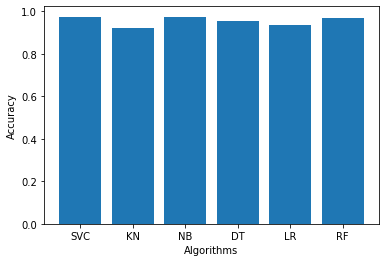

In [493]:
# Accuracy graph
accuracies=[0.9729381443298969,0.9188144329896907,0.9742268041237113,0.9536082474226805,0.9355670103092784,0.9690721649484536]

models=['SVC','KN','NB','DT','LR','RF']

plt.bar(models,accuracies)
plt.xlabel("Algorithms")
plt.ylabel("Accuracy")
#plt.show()

**MODEL PREDUCTIONS**

We wrote a function to test if the model can predict a message to be ham or spam

In [494]:
#write a function to detect if the message is spam or not
def find(predict_sms_class):
    if predict_sms_class == 1:
        print ("Message is SPAM")
    else:
        print ("Message is NOT Spam")

In [495]:
# Enter custom message to test for the classification (Ham or Spam)
custom_sms_to_preduct = ["Please , your prize for , free 500GB internet bundles is in your account"]
vectorized_integers = spam_classifyer_vectorizer.transform(custom_sms_to_preduct)

In [496]:
# Predict the class of the captured custom sms
sms_predicted_class = mnb.predict(vectorized_integers)
find(sms_predicted_class)

Message is SPAM


Checking Classification Results with Confusion Matrix

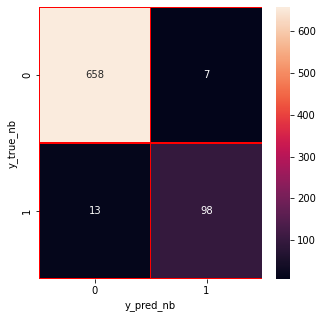

In [497]:
# Confusion Matrix 
from sklearn.metrics import confusion_matrix
import seaborn as sns
# Naive Bayes
y_pred_nb = mnb.predict(X_test)
y_true_nb = y_test
cm = confusion_matrix(y_true_nb, y_pred_nb)
f, ax = plt.subplots(figsize =(5,5))
sns.heatmap(cm,annot = True,linewidths=0.5,linecolor="red",fmt = ".0f",ax=ax)
plt.xlabel("y_pred_nb")
plt.ylabel("y_true_nb")
# Plot
plt.show()

from the confusion matrix, we can see that the Naive Bayes model is balanced. That's it !! we have successfully created a spam classifier.